In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils import data
import torchmetrics
from PIL import Image
from torchmetrics.classification import MulticlassJaccardIndex, MulticlassAccuracy
from torchvision import transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import os

In [2]:
a = torch.Tensor([torch.nan, 2 , 2, 2])
b = torch.Tensor([1, torch.nan, 3, 4])

print(torch.where((a*b) >= 0, a*b, torch.zeros_like(a)))

tensor([0., 0., 6., 8.])


In [5]:
iou = torch.Tensor([7.2245e-02, 1.4012e-03, 4.4294e-03, 8.7555e-03, 2.3965e-01, 4.4194e-06,
        1.0709e-02, 0.0, 1.8346e-03, 5.7599e-03, 0.0, 3.8321e-01,
        9.0109e-02, 1.2270e-01])
print(iou)
print(iou.mean())
test2 = torch.Tensor([7.2245e-02, 1.4012e-03, 4.4294e-03, 8.7555e-03, 2.3965e-01, 4.4194e-06,
        1.0709e-02, 0.0, 1.8346e-03, 5.7599e-03, 0.0, 3.8321e-01,
        9.0109e-02, 1.2270e-01, torch.nan])
print(test2)
print(test2[~torch.isnan(test2)].mean())

tensor([7.2245e-02, 1.4012e-03, 4.4294e-03, 8.7555e-03, 2.3965e-01, 4.4194e-06,
        1.0709e-02, 0.0000e+00, 1.8346e-03, 5.7599e-03, 0.0000e+00, 3.8321e-01,
        9.0109e-02, 1.2270e-01])
tensor(0.0672)
tensor([7.2245e-02, 1.4012e-03, 4.4294e-03, 8.7555e-03, 2.3965e-01, 4.4194e-06,
        1.0709e-02, 0.0000e+00, 1.8346e-03, 5.7599e-03, 0.0000e+00, 3.8321e-01,
        9.0109e-02, 1.2270e-01,        nan])
tensor(0.0672)


In [15]:
test = torch.Tensor([[4.0, torch.inf, 2.0], [torch.inf, 1.0, torch.inf]])
ones = torch.ones_like(test)
print(ones)
print((torch.masked_select(test-ones, ~torch.isinf(test-ones))))

print(test[test != torch.inf].sum())


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([3., 1., 0.])
tensor(7.)


In [9]:
task_num = 2
scale = torch.nn.Parameter(torch.tensor([-0.5] * task_num))
losses = [torch.Tensor([2.5]), torch.Tensor([5])]

print(scale)
print(losses)

weighted_seg_loss = 0.5 * torch.exp(-log_var_seg) * seg_loss + 0.5 * log_var_seg 
weighted_depth_loss = 0.5 * torch.exp(-log_var_depth) * depth_loss + 0.5 * log_var_depth
loss_value = torch.mean(weighted_seg_loss + weighted_depth_loss)
# loss_value = (losses / (2*scale.exp()) + scale/2).sum()

print(loss_value)

Parameter containing:
tensor([-0.5000, -0.5000], requires_grad=True)
[tensor([2.5000]), tensor([5.])]
tensor([1.2131, 1.2131], grad_fn=<MulBackward0>)


In [4]:
import torch
import torch.nn.functional as F

loss_fn1 = torch.nn.MSELoss()
loss_fn2 = torch.nn.L1Loss()

x = torch.randn(10, 5).flatten()
y = torch.randn(10, 5).flatten()

output = torch.nn.Linear(50, 1)(x)

loss1 = loss_fn1(output, y)
loss2 = loss_fn2(output, y)

combined_loss = torch.stack((loss1, loss2))
weights = F.softmax(torch.randn(2), dim=-1)

combined_loss_random = torch.sum(combined_loss * weights)
print(loss1)
print(loss2)

print(combined_loss)
print(combined_loss_random)
loss = loss1 + loss2

print(loss)
# loss.backward()

# optimizer.step()

tensor(1.0824, grad_fn=<MseLossBackward0>)
tensor(0.8608, grad_fn=<MeanBackward0>)
tensor([1.0824, 0.8608], grad_fn=<StackBackward0>)
tensor(0.9629, grad_fn=<SumBackward0>)
tensor(1.9432, grad_fn=<AddBackward0>)


/zhome/8e/0/164333/thesis_env/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/zhome/8e/0/164333/thesis_env/lib/python3.10/site-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([50])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


In [10]:
print(loss1)
print(loss2)

print(loss)

tensor(1.0369, grad_fn=<MseLossBackward0>)
tensor(0.7629, grad_fn=<MeanBackward0>)
tensor(1.7998, grad_fn=<AddBackward0>)


In [5]:
t = torch.Tensor([1.0, 0.5, torch.inf, 0.0, -torch.inf])
print(t[~torch.isinf(t)])

tensor([1.0000, 0.5000, 0.0000])


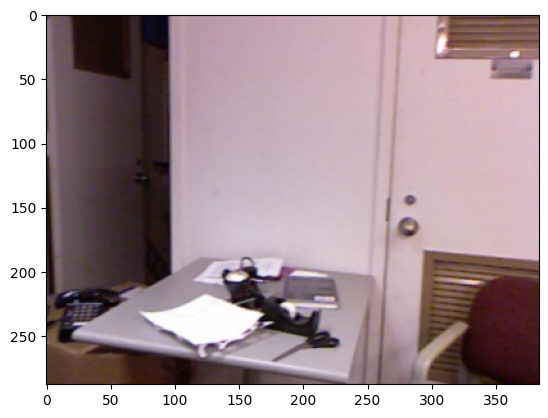

uint8


In [7]:
path = './dataset/split_nyuv2/train/image/0.npy'
img = np.load(path)
img = np.uint8(img*255)

plt.imshow(img)
plt.show()
print(img.dtype)

In [59]:
def iou_metric(pred, target, average='mean') -> list:
    """
        Description: 
            Calculate the IoU metric over the prediction tensor and the target for each category

        Input:
            pred <Tensor>: prediction tensor. Shape [batch_size, num_classes, w, h]
            target <Tensor>: target tensor. Shape [batch_size, w, h]

        Output:
            ious <list>: IoU metrics for each class
    """

    num_classes = pred.size(1)
    ious = []
    print(num_classes)
    pred = torch.argmax(pred, dim=1) # Calculate the most probable classe over all

    pred = pred.contiguous().view(-1)
    target = target.contiguous().view(-1)

    # Calculate the intersection and union over each class
    for c in range(num_classes+1):
        pred_idx = pred == c
        target_idx = target == c

        intersection = (pred_idx[target_idx]).long().sum().cpu()
        union = pred_idx.long().sum().cpu() + target_idx.long().sum().cpu() - intersection

        ious.append(intersection / float(max(union,1)))

    ious = torch.Tensor(ious)
    if average == 'mean':
        return ious.mean()

    return ious

In [60]:
pred = torch.rand((2, 14, 2, 3))
target = torch.randint(0, 15, size=(2, 2, 3))

print(target.flatten(), target.shape)
print(torch.argmax(pred, dim=1).flatten(), pred.shape)

iou = iou_metric(pred, target, None)
print(iou)
print(iou.mean())

y_true = target.flatten()
y_pred = torch.argmax(pred, dim=1).flatten()

conf_matrix = confusion_matrix(y_true, y_pred)

print(conf_matrix)
tp = np.diag(conf_matrix)
fp = np.sum(conf_matrix, axis=0) - tp
fn = np.sum(conf_matrix, axis=1) - tp
tn = np.sum(conf_matrix) - tp - fp - fn

print(tp, fp, fn, tn)

print(f'Numerator: {tp}')
print(f'Denominator: {tp + fp + fn}')

print(tp / (tp + fp + fn))

jaccard = MulticlassJaccardIndex(num_classes=14, average=None) # WORKS!!!
mIoU = jaccard(pred, target)

print(mIoU)
print(mIoU.mean())

print(jaccard(torch.argmax(pred, dim=1), target).mean())

tensor([13,  2,  6, 10, 13,  5,  8,  1, 11,  3,  1, 11]) torch.Size([2, 2, 3])
tensor([ 9,  3,  5, 13,  2,  4,  8, 11,  5,  2,  2, 13]) torch.Size([2, 14, 2, 3])
14
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
tensor(0.0667)
[[0 1 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 0]]
[0 0 0 0 0 0 1 0 0 0 0] [0 3 1 1 2 0 0 1 0 1 2] [2 1 1 0 1 1 0 0 1 2 2] [10  8 10 11  9 11 11 11 11  9  8]
Numerator: [0 0 0 0 0 0 1 0 0 0 0]
Denominator: [2 4 2 1 3 1 1 1 1 3 4]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
tensor(0.0714)
tensor(0.0714)


In [49]:
print(target.flatten())
pred2 = torch.argmax(pred, dim=1)
print(pred2.flatten())

unique_values = torch.unique(pred2)
counts = torch.bincount(pred2.view(-1))

print('Unique values: ', unique_values)
print(counts)

idx_correct = (target == pred2).flatten()
correct = target.flatten()[idx_correct]
print('Index of correctly predicted: ', idx_correct)
print('Elements correctly predicted: ', correct)
correct_count = torch.bincount(correct)
print(correct_count)

zero_pad = torch.zeros(len(unique_values)-len(correct_count))
correct_count2 = torch.cat([correct_count, zero_pad])
print(correct_count2)

print(correct_count2 / counts)

tensor([0, 1, 2, 0, 0, 2])
tensor([1, 1, 1, 2, 1, 2])
Unique values:  tensor([1, 2])
tensor([0, 4, 2])
Index of correctly predicted:  tensor([False,  True, False, False, False,  True])
Elements correctly predicted:  tensor([1, 2])
tensor([0, 1, 1])


RuntimeError: Trying to create tensor with negative dimension -1: [-1]

In [55]:
def compute_pixel_accuracy(predictions, targets):

    predictions = torch.argmax(predictions, dim=1)
    pixel_accuracy = torchmetrics.functional.accuracy(predictions, targets, num_classes=3, task='multiclass', average=None)
    return pixel_accuracy

pixel_accuracy = compute_pixel_accuracy(pred, target)
print(pixel_accuracy)

tensor([0.0000, 1.0000, 0.5000])


In [59]:

print(f'Target: {target.flatten()}')
# pred = torch.argmax(pred, dim=1)
print(f'Prediction: {torch.argmax(pred, dim=1).flatten()}')

accuracy = MulticlassAccuracy(num_classes=3, average=None)
px_acc = accuracy(pred2, target)
print(px_acc)
print(px_acc.mean())

print('\nCalcualted with Confusion Matrix')
numerator = tp + tn
print(f'Numerator: {numerator}')
denominator = tp + tn + fp + fn
print(f'Denominator: {denominator}')

print(f'Pixel accuracy: {numerator / denominator}')
print(f'Mean accuracy: {np.mean(numerator / denominator)}')

Target: tensor([0, 1, 2, 0, 0, 2])
Prediction: tensor([1, 1, 1, 2, 1, 2])
tensor([0.0000, 1.0000, 0.5000])
tensor(0.5000)
tensor([0.0000, 1.0000, 0.5000])

Calcualted with Confusion Matrix
Numerator: [3 3 4]
Denominator: [6 6 6]
Pixel accuracy: [0.5        0.5        0.66666667]
Mean accuracy: 0.5555555555555555


In [58]:
correct = (y_pred == y_true).sum()
total = 6

print(correct / total)

tensor(0.3333)


In [23]:
class NYUv2Dataset(data.Dataset):
    def __init__(self, root, split, transform=None):
        self.root = os.path.join(root, split)

        for r, _, files in os.walk(self.root):
            if r.endswith('depth'):
                self.depth_paths = list(map(lambda x: os.path.join(r, x), files))
            elif r.endswith('image'):
                self.image_paths = list(map(lambda x: os.path.join(r, x), files))
            elif r.endswith('label'):
                self.label_paths = list(map(lambda x: os.path.join(r, x), files))

        self.transform = transform

    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, index):
        image = np.load(self.image_paths[index]) # RGB image (288, 384, 3)
        depth = np.load(self.depth_paths[index])#.reshape((1, 288, 384)) # Depth ground truth (288, 384, 1)
        label = np.load(self.label_paths[index]) # Segmentation map (288, 384)

        sample = {'image': image,
                  'depth': depth,
                  'label': label}
        
        if self.transform is not None:
            sample = self.transform(sample)
        
        return sample
        

In [33]:
path = 'dataset/split_nyuv2/' 
test = NYUv2Dataset(path, 'train')
print(test[300]['image'].shape)
print(test[300]['depth'])

(288, 384, 3)
[[[1.7430776]
  [1.7521085]
  [1.7649674]
  ...
  [4.3640184]
  [4.3644443]
  [4.3653555]]

 [[1.7437009]
  [1.753637 ]
  [1.766505 ]
  ...
  [4.363987 ]
  [4.3640337]
  [4.364856 ]]

 [[1.7462183]
  [1.7541747]
  [1.7682507]
  ...
  [4.364108 ]
  [4.36399  ]
  [4.3642626]]

 ...

 [[1.6361148]
  [1.6453911]
  [1.6614026]
  ...
  [2.074039 ]
  [2.0737872]
  [2.0761507]]

 [[1.6348741]
  [1.6496584]
  [1.669607 ]
  ...
  [2.060896 ]
  [2.0632625]
  [2.064485 ]]

 [[1.6491399]
  [1.658726 ]
  [1.671911 ]
  ...
  [2.054434 ]
  [2.0545692]
  [2.0600612]]]


In [10]:
dataloader = data.DataLoader(test, shuffle=True, batch_size=1, generator=torch.Generator().manual_seed(42))


In [27]:
new_path = 'dataset/split_nyuv2/test/'

def process_files(root, files):
    for f in files:
        path = os.path.join(root, f)
        tmp = np.squeeze(np.load(path), axis=0)
        np.save(path, tmp)



for r, _, files in os.walk(new_path):
    print(r)
    if r.endswith('image'):
        process_files(r, files)
    elif r.endswith('depth'):
        process_files(r, files)
    elif r.endswith('label'):
        process_files(r, files)


dataset/split_nyuv2/test/
dataset/split_nyuv2/test/depth
dataset/split_nyuv2/test/label
dataset/split_nyuv2/test/image


In [8]:
index_val = 0
index_test = 0
for i, batch in enumerate(dataloader):
    image, depth, label = batch['image'], batch['depth'], batch['label']

    if i % 2 == 0:
        np.save(os.path.join(new_path, f'val/image/{index_val}.npy'), image.numpy())
        np.save(os.path.join(new_path,f'val/depth/{index_val}.npy'), depth.numpy())
        np.save(os.path.join(new_path,f'val/label/{index_val}.npy'), label.numpy())
        index_val += 1
    else:
        index = i-1
        np.save(os.path.join(new_path,f'test/image/{index_test}.npy'), image.numpy())
        np.save(os.path.join(new_path,f'test/depth/{index_test}.npy'), depth.numpy())
        np.save(os.path.join(new_path,f'test/label/{index_test}.npy'), label.numpy())
        index_test += 1

    if i % 50 == 0:
        print(f'[INFO] Images saved: {i}')

[INFO] Images saved: 0
[INFO] Images saved: 50
[INFO] Images saved: 100
[INFO] Images saved: 150
[INFO] Images saved: 200
[INFO] Images saved: 250
[INFO] Images saved: 300
[INFO] Images saved: 350
[INFO] Images saved: 400
[INFO] Images saved: 450
[INFO] Images saved: 500
[INFO] Images saved: 550
[INFO] Images saved: 600
[INFO] Images saved: 650


In [4]:
def show_sample(image, depth, label):
    fig, ax = plt.subplots(1, 3, figsize=(12,6))
    ax[0].imshow(image)
    ax[0].set_title('Original Image')

    ax[1].imshow(depth, cmap='viridis')
    ax[1].set_title('Depth GT')

    ax[2].imshow(label)
    ax[2].set_title('Segmentation Mask')

    plt.show()

TypeError: Invalid shape (1, 288, 384, 3) for image data

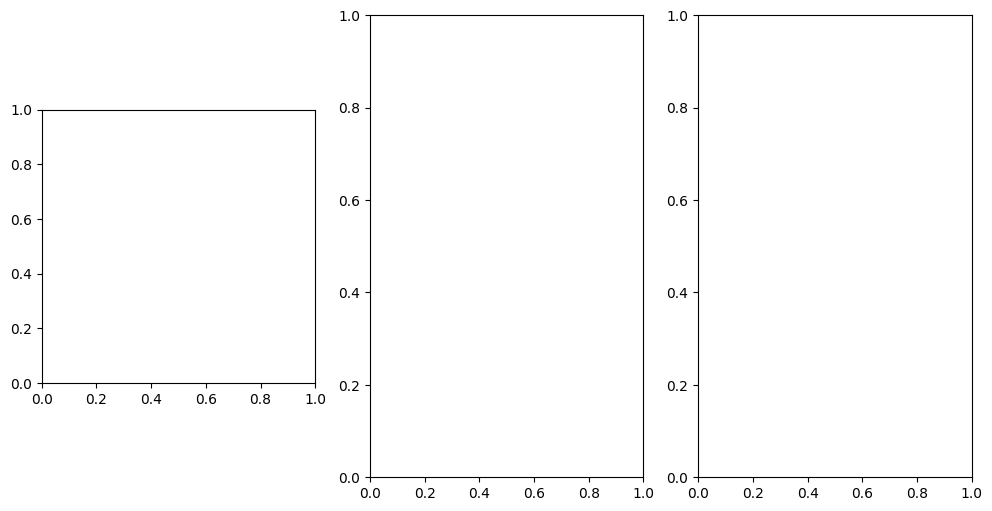

In [5]:
batch = next(iter(test))
img, depth, label = batch['image'], batch['depth'], batch['label']
show_sample(img, depth, label)

In [41]:
import torch, sys, random
import torch.nn as nn
import torch.nn.functional as F
import numpy as np


class AbsWeighting(nn.Module):
    r"""An abstract class for weighting strategies.
    """
    def __init__(self):
        super(AbsWeighting, self).__init__()
        
    def init_param(self):
        r"""Define and initialize some trainable parameters required by specific weighting methods. 
        """
        pass

    def _compute_grad_dim(self):
        self.grad_index = []
        for param in self.get_share_params():
            self.grad_index.append(param.data.numel())
        self.grad_dim = sum(self.grad_index)

    def _grad2vec(self):
        grad = torch.zeros(self.grad_dim)
        count = 0
        for param in self.get_share_params():
            if param.grad is not None:
                beg = 0 if count == 0 else sum(self.grad_index[:count])
                end = sum(self.grad_index[:(count+1)])
                grad[beg:end] = param.grad.data.view(-1)
            count += 1
        return grad

    def _compute_grad(self, losses, mode, rep_grad=False):
        '''
        mode: backward, autograd
        '''
        if not rep_grad:
            grads = torch.zeros(self.task_num, self.grad_dim).to(self.device)
            for tn in range(self.task_num):
                if mode == 'backward':
                    losses[tn].backward(retain_graph=True) if (tn+1)!=self.task_num else losses[tn].backward()
                    grads[tn] = self._grad2vec()
                elif mode == 'autograd':
                    grad = list(torch.autograd.grad(losses[tn], self.get_share_params(), retain_graph=True))
                    grads[tn] = torch.cat([g.view(-1) for g in grad])
                else:
                    raise ValueError('No support {} mode for gradient computation')
                self.zero_grad_share_params()
        else:
            if not isinstance(self.rep, dict):
                grads = torch.zeros(self.task_num, *self.rep.size()).to(self.device)
            else:
                grads = [torch.zeros(*self.rep[task].size()) for task in self.task_name]
            for tn, task in enumerate(self.task_name):
                if mode == 'backward':
                    losses[tn].backward(retain_graph=True) if (tn+1)!=self.task_num else losses[tn].backward()
                    grads[tn] = self.rep_tasks[task].grad.data.clone()
        return grads

    def _reset_grad(self, new_grads):
        count = 0
        for param in self.get_share_params():
            if param.grad is not None:
                beg = 0 if count == 0 else sum(self.grad_index[:count])
                end = sum(self.grad_index[:(count+1)])
                param.grad.data = new_grads[beg:end].contiguous().view(param.data.size()).data.clone()
            count += 1
            
    def _get_grads(self, losses, mode='backward'):
        r"""This function is used to return the gradients of representations or shared parameters.

        If ``rep_grad`` is ``True``, it returns a list with two elements. The first element is \
        the gradients of the representations with the size of [task_num, batch_size, rep_size]. \
        The second element is the resized gradients with size of [task_num, -1], which means \
        the gradient of each task is resized as a vector.

        If ``rep_grad`` is ``False``, it returns the gradients of the shared parameters with size \
        of [task_num, -1], which means the gradient of each task is resized as a vector.
        """
        if self.rep_grad:
            per_grads = self._compute_grad(losses, mode, rep_grad=True)
            if not isinstance(self.rep, dict):
                grads = per_grads.reshape(self.task_num, self.rep.size()[0], -1).sum(1)
            else:
                try:
                    grads = torch.stack(per_grads).sum(1).view(self.task_num, -1)
                except:
                    raise ValueError('The representation dimensions of different tasks must be consistent')
            return [per_grads, grads]
        else:
            self._compute_grad_dim()
            grads = self._compute_grad(losses, mode)
            return grads
        
    def _backward_new_grads(self, batch_weight, per_grads=None, grads=None):
        r"""This function is used to reset the gradients and make a backward.

        Args:
            batch_weight (torch.Tensor): A tensor with size of [task_num].
            per_grad (torch.Tensor): It is needed if ``rep_grad`` is True. The gradients of the representations.
            grads (torch.Tensor): It is needed if ``rep_grad`` is False. The gradients of the shared parameters. 
        """
        if self.rep_grad:
            if not isinstance(self.rep, dict):
                # transformed_grad = torch.einsum('i, i... -> ...', batch_weight, per_grads)
                transformed_grad = sum([batch_weight[i] * per_grads[i] for i in range(self.task_num)])
                self.rep.backward(transformed_grad)
            else:
                for tn, task in enumerate(self.task_name):
                    rg = True if (tn+1)!=self.task_num else False
                    self.rep[task].backward(batch_weight[tn]*per_grads[tn], retain_graph=rg)
        else:
            # new_grads = torch.einsum('i, i... -> ...', batch_weight, grads)
            new_grads = sum([batch_weight[i] * grads[i] for i in range(self.task_num)])
            self._reset_grad(new_grads)
    
    @property
    def backward(self, losses, **kwargs):
        r"""
        Args:
            losses (list): A list of losses of each task.
            kwargs (dict): A dictionary of hyperparameters of weighting methods.
        """
        pass



class RLW(AbsWeighting):
    r"""Random Loss Weighting (RLW).
    
    This method is proposed in `Reasonable Effectiveness of Random Weighting: A Litmus Test for Multi-Task Learning (TMLR 2022) <https://openreview.net/forum?id=jjtFD8A1Wx>`_ \
    and implemented by us.

    """
    def __init__(self):
        super(RLW, self).__init__()
        
    def backward(self, losses, **kwargs):
        batch_weight = F.softmax(torch.randn(self.task_num), dim=-1).to(self.device)
        loss = torch.mul(losses, batch_weight).sum()
        loss.backward()
        return batch_weight.detach().cpu().numpy()


class UW(AbsWeighting):
    r"""Uncertainty Weights (UW).
    
    This method is proposed in `Multi-Task Learning Using Uncertainty to Weigh Losses for Scene Geometry and Semantics (CVPR 2018) <https://openaccess.thecvf.com/content_cvpr_2018/papers/Kendall_Multi-Task_Learning_Using_CVPR_2018_paper.pdf>`_ \
    and implemented by us. 

    """
    def __init__(self):
        super(UW, self).__init__()
        
    def init_param(self):
        self.loss_scale = nn.Parameter(torch.tensor([-0.5]*self.task_num, device=self.device))
        
    def backward(self, losses, **kwargs):
        loss = (losses/(2*self.loss_scale.exp())+self.loss_scale/2).sum()
        loss.backward()
        return (1/(2*torch.exp(self.loss_scale))).detach().cpu().numpy()


In [35]:
class RLW:
    def __init__(self):
        self.task_num = 2
        self.device = torch.device('cpu')

    def backward(self, losses: torch.Tensor, **kwargs):
        batch_weight = F.softmax(torch.randn(self.task_num), dim=-1).to(self.device)
        loss = torch.mul(losses, batch_weight).sum()
        loss.backward()
        return batch_weight.detach().cpu().numpy()

In [39]:
weighting_rlw = RLW()

loss1 = nn.CrossEntropyLoss()
loss2 = nn.CrossEntropyLoss()

In [30]:
depth = transforms.ToTensor()(depth)
label = transforms.ToTensor()(label)

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [40]:
loss1_value = loss1(depth, depth)
loss2_value = loss2(label, label)

weighting_rlw.backward(torch.Tensor([loss1_value, loss2_value]))


AttributeError: 'RLW' object has no attribute 'task_num'

In [4]:
import torch
t = torch.rand((3,2))
print(t.dim())

2
